This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [30]:
os.chdir("../../data/analysis_2_results")

import the count matrix from computeMatrix

In [31]:
enhancers = pd.read_csv("ChromHMM_enhancers_reads.tab",header = 0,sep = "\t")
promoters = pd.read_csv("ChromHMM_promoters_reads.tab",header = 0,sep = "\t")

aggregate the RPKM values for all the bins(columns) for each region

In [34]:
reads_enhancers = enhancers.filter(regex = "CTRL").sum(axis = 1)
reads_promoters = promoters.filter(regex = "CTRL").sum(axis = 1)
reads_enhancers
reads_plot = pd.DataFrame({'enhancers':reads_enhancers,'promoters':reads_promoters})

Perform statistical test

In [35]:
#scipy.stats.ttest_ind(reads_plot['enhancers'], reads_plot['promoters'])

Plot

In [36]:
# Join the two data frame together for plotting
reads_plot['sample']='all'

In [37]:
reads_plot = pd.melt(reads_plot, id_vars='sample', var_name="condition", value_name="RPKM")

In [41]:
final_plot = reads_plot
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])
final_plot

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sample,condition,RPKM,log2_RPKM
0,all,enhancers,0.0,-inf
1,all,enhancers,0.0,-inf
2,all,enhancers,0.0,-inf
3,all,enhancers,0.0,-inf
4,all,enhancers,0.0,-inf
...,...,...,...,...
333649,all,promoters,NaN,NaN
333650,all,promoters,NaN,NaN
333651,all,promoters,NaN,NaN
333652,all,promoters,NaN,NaN


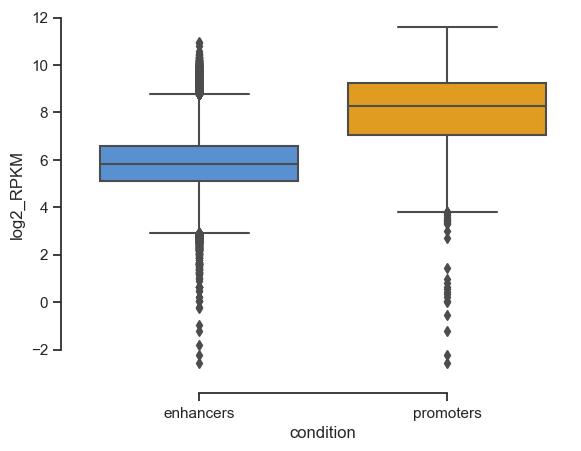

In [46]:
sns.set_theme(style="ticks")
my_pal = {"enhancers":"#448ee4","promoters": "orange"}
sns.boxplot(x="condition", y="log2_RPKM",
            palette=my_pal,
            data=final_plot)
sns.despine(offset=10, trim=True)